This code generates figure 3 of Liang &Sun (2018)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import cm
import math
from matplotlib.colors import Normalize

In [2]:
kegg_data=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Replication/GO analysis/Copy of KEGGoutput2count1.csv')
kegg_data

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,KEGG_PATHWAY,hsa04610:Complement and coagulation cascades,7,3.211009,0.001325,"205382_S_AT, 207808_S_AT, 203854_AT, 211429_S_...",123,69,6879,5.673736,0.221681,0.250453,0.250453
1,KEGG_PATHWAY,hsa00350:Tyrosine metabolism,5,2.293578,0.003224,"214308_S_AT, 205221_AT, 203180_AT, 209612_S_AT...",123,35,6879,7.989547,0.456794,0.304641,0.304641
2,KEGG_PATHWAY,hsa05144:Malaria,5,2.293578,0.010788,"212157_AT, 217414_X_AT, 211696_X_AT, 211699_X_...",123,49,6879,5.706819,0.871276,0.676598,0.676598
3,KEGG_PATHWAY,hsa05222:Small cell lung cancer,6,2.752294,0.017170,"214701_S_AT, 211719_X_AT, 205954_AT, 210495_X_...",123,85,6879,3.947776,0.962116,0.676598,0.676598
4,KEGG_PATHWAY,hsa04512:ECM-receptor interaction,6,2.752294,0.018811,"214701_S_AT, 211719_X_AT, 202310_S_AT, 202311_...",123,87,6879,3.857023,0.972380,0.676598,0.676598
5,KEGG_PATHWAY,hsa05200:Pathways in cancer,14,6.422018,0.021479,"211719_X_AT, 205016_AT, 209270_AT, 211725_S_AT...",123,393,6879,1.992304,0.983491,0.676598,0.676598
6,KEGG_PATHWAY,hsa04151:PI3K-Akt signaling pathway,12,5.504587,0.041845,"211719_X_AT, 202310_S_AT, 202311_S_AT, 205713_...",123,345,6879,1.945281,0.999690,0.989803,0.989803
7,KEGG_PATHWAY,hsa00980:Metabolism of xenobiotics by cytochro...,5,2.293578,0.041896,"211653_X_AT, 203180_AT, 209612_S_AT, 202435_S_...",123,74,6879,3.778840,0.999693,0.989803,0.989803


In [5]:
pat_terms=np.asarray(kegg_data['Term'])
pat_terms

array(['hsa04610:Complement and coagulation cascades',
       'hsa00350:Tyrosine metabolism', 'hsa05144:Malaria',
       'hsa05222:Small cell lung cancer',
       'hsa04512:ECM-receptor interaction', 'hsa05200:Pathways in cancer',
       'hsa04151:PI3K-Akt signaling pathway',
       'hsa00980:Metabolism of xenobiotics by cytochrome P450'],
      dtype=object)

In [19]:
counts=np.asarray(kegg_data['Count'])
counts

array([ 7,  5,  5,  6,  6, 14, 12,  5])

In [8]:
p_values=np.asarray(kegg_data['PValue'])
p_values=-np.log10(p_values)
p_values

array([2.87773615, 2.49164322, 1.96704349, 1.76524086, 1.72558058,
       1.66797969, 1.37835494, 1.37782309])

In [10]:
folds=np.asarray(kegg_data['Fold Enrichment'])
folds

array([5.6737363 , 7.98954704, 5.70681931, 3.94777618, 3.85702271,
       1.99230435, 1.94528102, 3.77883982])

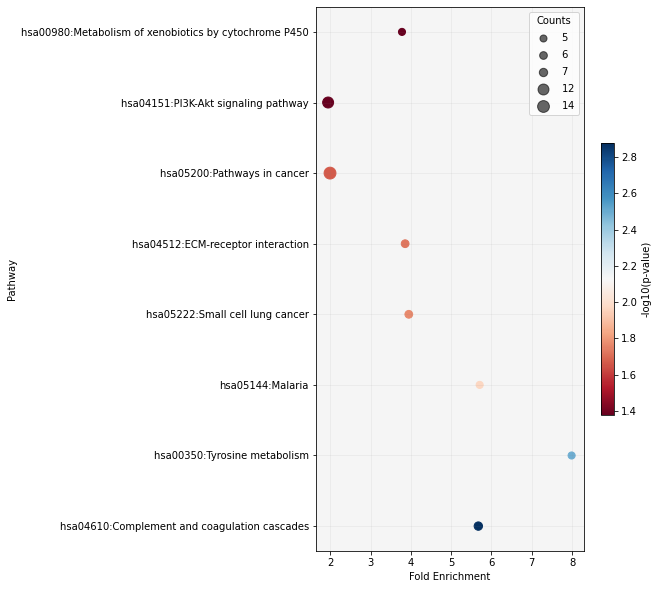

In [55]:
fig, ax = plt.subplots(figsize=(6,10))
my_cmap = cm.get_cmap('RdBu')
sc=ax.scatter(folds, pat_terms, c=p_values, s=counts*10, cmap=my_cmap)
plt.colorbar(sc,shrink=0.5,label='-log10(p-value)')
kw=dict(prop="sizes",func=lambda s: s/10,alpha=0.6)

handles, labels = sc.legend_elements(prop="sizes",func=lambda s: s/10,alpha=0.6)
legend2 = ax.legend(handles, labels, loc="best", title="Counts")
plt.ylabel('Pathway')
plt.xlabel('Fold Enrichment')
plt.grid(alpha=0.1,color='gray')
ax.set_facecolor('whitesmoke')
plt.show()